### Предобработка данных

<div>
    <font color="green">Изучены данные методом describe, info. Построены гистограммы.</font><a class="tocSkip">
</div>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

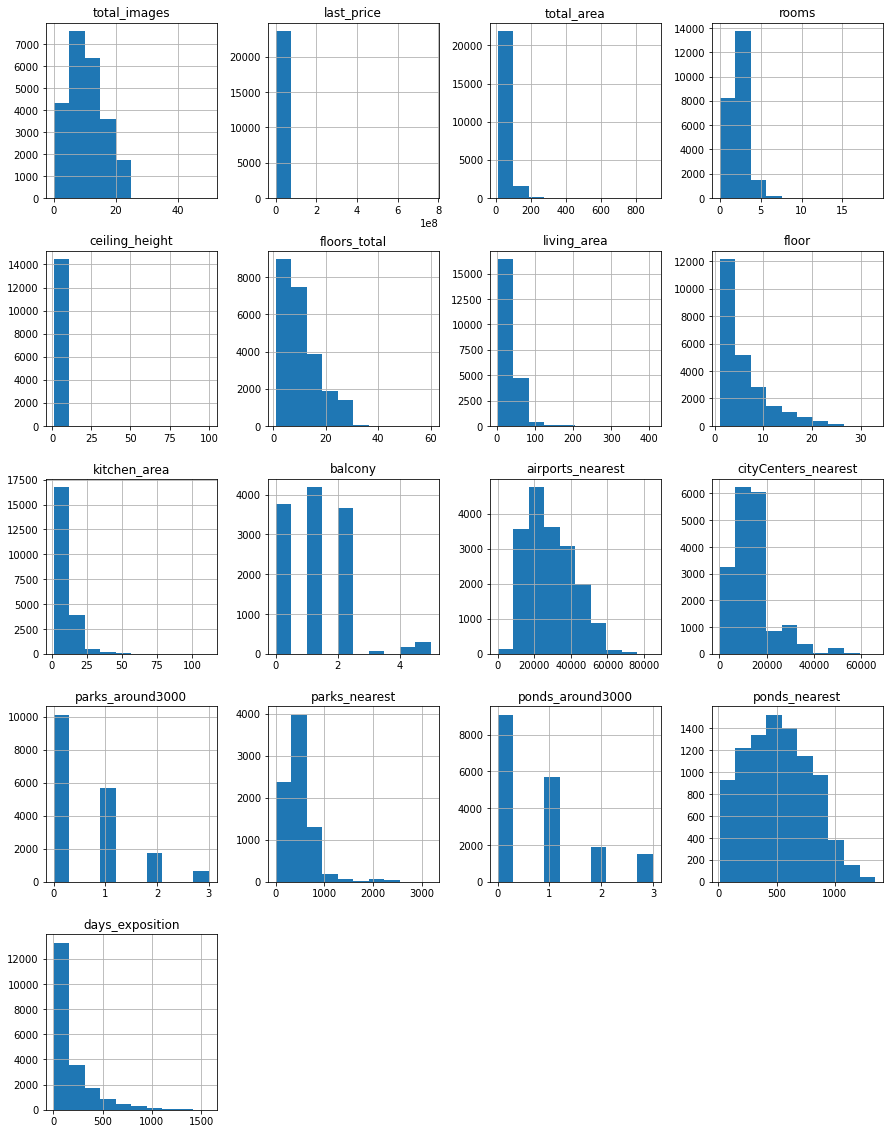

In [2]:
data.info()
data.hist(figsize=(15,20))


<div>
<h2><font color="green">Пропуски</font><a class="tocSkip"></h2>
        
<font color="green">В столбце "balcony" пропущенные значения заменены на значение 0.0.</font>
</div>

In [3]:
data.loc[data['balcony'].isna(), 'balcony']=0.0


<div>
    <font color="green">Удалены строки с пропусками в столбце "locality_name", так как пропусков в этом столбце немного.</font>
</div>

In [4]:
data.drop(data.loc[data['locality_name'].isna()].index, inplace=True)
data['locality_name'].isna().sum()

0

<div>
<h2><font color="green">Дубликаты</font><a class="tocSkip"></h2>
        
<font color="green">Объеденены названия одних и тех же населённых пунктов. В каждом имени, которое имеет другой вид записи в данных, оставленны только названия, без указания типа.</font>
</div>

In [5]:
data.loc[data['locality_name']=='деревня Бор','locality_name'] = 'деревня бор'# переименование данного
#населённого пункта, потому что Бор входит в названия других населённых пунктов.

In [6]:
value_name = []
for j in range(len(data['locality_name'].value_counts().index)):#для каждого уникального значения названия
    value_lst = data['locality_name'].value_counts().index[j].split()#список из строк названия
    value = []
    count_value = 0
    for k in range(len(value_lst)):#для каждой строки из списка названия
        if value_lst[k]!=value_lst[k].lower():#сравнение с таким же списком, но в нижнем регистре
            value+=[value_lst[k]]#если какая-либо строка из списка отличается, значит она изначально с заглавной буквы
            count_value+=1#число слов в названии без типа
    value = ' '.join(value)#объединение в полноценное название
    count = 0
    name = []

    for i in data['locality_name'].unique():#перебор уникальных названий
        if value in i and value!='':
            name.append(i)#в список добавляются названия с типами, в которые входит выше найденное значение
            count+=1#число названий с типами с выше найденным значением
    if count>1:#если есть названия одного и того же населённго пункта, но записанные по разному
        value_name.append([value, name])
for elem in value_name:
    data.loc[data['locality_name'].isin(elem[1]),'locality_name'] = elem[0]#замена на единое значение 

<div>
<h2><font color="green">Типы</font><a class="tocSkip"></h2>
        
<font color="green">Перевод даты в тип Datetime</font>
</div>



In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div>
<h2><font color="green">Выбросы и аномальные значения</font><a class="tocSkip"></h2>
        
<font color="green">Исправление в столбце высоты потолка слишком высоких неправдоподобных значений делением на 10. Берутся для замены значения, которые больше 24.</font>
</div>



In [8]:
data['ceiling_height'].sort_values().unique()
data.loc[data['ceiling_height']>24,'ceiling_height'] = data.loc[data['ceiling_height']>24,'ceiling_height']/10

<div>
    <font color="green">Функция для построения графиков и поиска выбросов.</font>
</div>

In [9]:
def remove_value(col):
    data.boxplot(col, figsize=(3, 3))
    plt.show()
    value_remove_max = data[col].describe()['75%']+1.5*(data[col].describe()['75%']\
                                                  -data[col].describe()['25%'])
    value_remove_min = data[col].describe()['25%']-1.5*(data[col].describe()['75%']\
                                                  -data[col].describe()['25%'])
    print(f'Верхний край в оставленных данных в столбце {col} : ', value_remove_max)
    print(f'Нижний край в оставленных данных в столбце {col} : ', value_remove_min)
    data.query(f'@value_remove_min<{col}<@value_remove_max or {col}.isna()', inplace=True)
    data.boxplot(col, figsize=(3, 3))
    plt.show()
    return 


<div>
    <font color="green">Удаление выбросов по столбцам.</font>
</div>

Удаление выбросов в столбце total_images.


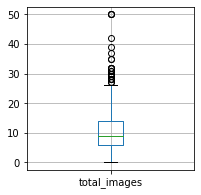

Верхний край в оставленных данных в столбце total_images :  26.0
Нижний край в оставленных данных в столбце total_images :  -6.0


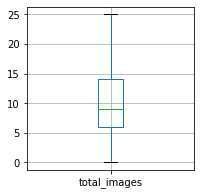

Удаление выбросов в столбце last_price.


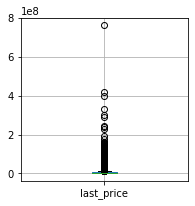

Верхний край в оставленных данных в столбце last_price :  11812610.0
Нижний край в оставленных данных в столбце last_price :  -1647566.0


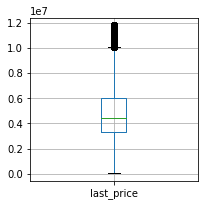

Удаление выбросов в столбце total_area.


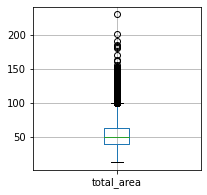

Верхний край в оставленных данных в столбце total_area :  99.75
Нижний край в оставленных данных в столбце total_area :  2.5500000000000043


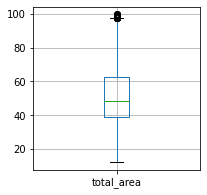

Удаление выбросов в столбце rooms.


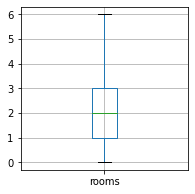

Верхний край в оставленных данных в столбце rooms :  6.0
Нижний край в оставленных данных в столбце rooms :  -2.0


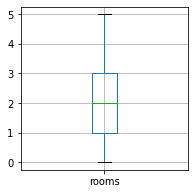

Удаление выбросов в столбце ceiling_height.


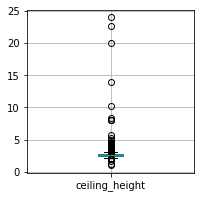

Верхний край в оставленных данных в столбце ceiling_height :  3.125
Нижний край в оставленных данных в столбце ceiling_height :  2.125


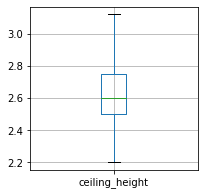

Удаление выбросов в столбце floors_total.


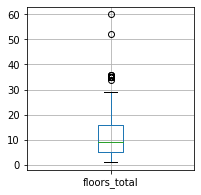

Верхний край в оставленных данных в столбце floors_total :  32.5
Нижний край в оставленных данных в столбце floors_total :  -11.5


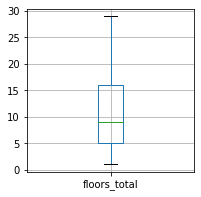

Удаление выбросов в столбце living_area.


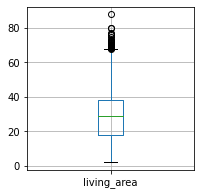

Верхний край в оставленных данных в столбце living_area :  68.0
Нижний край в оставленных данных в столбце living_area :  -12.0


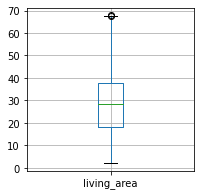

Удаление выбросов в столбце floor.


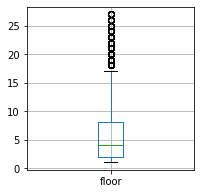

Верхний край в оставленных данных в столбце floor :  17.0
Нижний край в оставленных данных в столбце floor :  -7.0


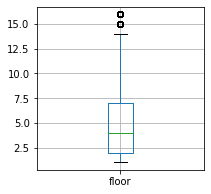

Удаление выбросов в столбце kitchen_area.


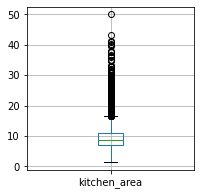

Верхний край в оставленных данных в столбце kitchen_area :  16.6
Нижний край в оставленных данных в столбце kitchen_area :  1.2400000000000002


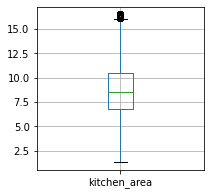

Удаление выбросов в столбце balcony.


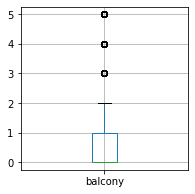

Верхний край в оставленных данных в столбце balcony :  2.5
Нижний край в оставленных данных в столбце balcony :  -1.5


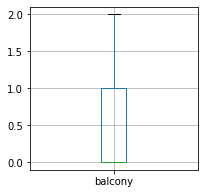

Удаление выбросов в столбце airports_nearest.


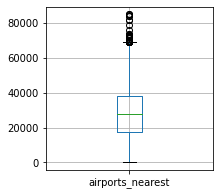

Верхний край в оставленных данных в столбце airports_nearest :  68797.5
Нижний край в оставленных данных в столбце airports_nearest :  -13014.5


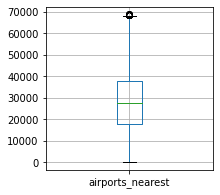

Удаление выбросов в столбце cityCenters_nearest.


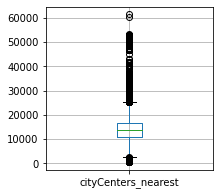

Верхний край в оставленных данных в столбце cityCenters_nearest :  25308.0
Нижний край в оставленных данных в столбце cityCenters_nearest :  2412.0


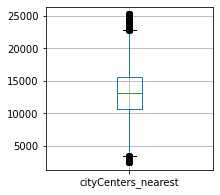

Удаление выбросов в столбце parks_around3000.


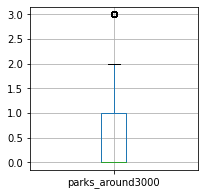

Верхний край в оставленных данных в столбце parks_around3000 :  2.5
Нижний край в оставленных данных в столбце parks_around3000 :  -1.5


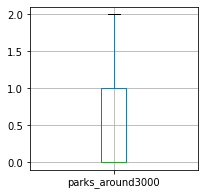

Удаление выбросов в столбце parks_nearest.


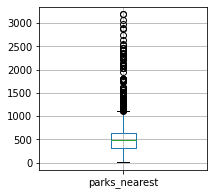

Верхний край в оставленных данных в столбце parks_nearest :  1105.5
Нижний край в оставленных данных в столбце parks_nearest :  -162.5


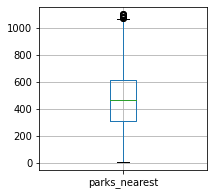

Удаление выбросов в столбце ponds_around3000.


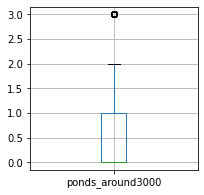

Верхний край в оставленных данных в столбце ponds_around3000 :  2.5
Нижний край в оставленных данных в столбце ponds_around3000 :  -1.5


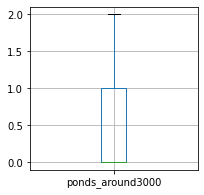

Удаление выбросов в столбце ponds_nearest.


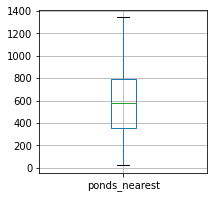

Верхний край в оставленных данных в столбце ponds_nearest :  1439.0
Нижний край в оставленных данных в столбце ponds_nearest :  -289.0


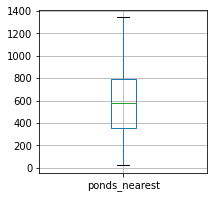

Удаление выбросов в столбце days_exposition.


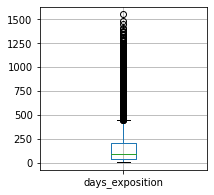

Верхний край в оставленных данных в столбце days_exposition :  449.5
Нижний край в оставленных данных в столбце days_exposition :  -202.5


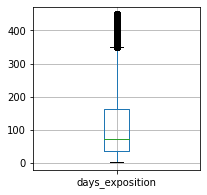

In [10]:
for col in data.columns:
    if col not in ['first_day_exposition', 'is_apartment', 'studio', 'open_plan', 'locality_name']:
        print(f'Удаление выбросов в столбце {col}.')
        remove_value(col)



### Посчитайте и добавьте в таблицу новые столбцы

<div>
    <font color="green">Добавление столбцов: цена за метр площади, день недели размещения объявления, месяц, год, тип этажа, расстояние до центра города в километрах.</font>
</div>

In [11]:
data['price_meter'] = data['last_price']/data['total_area']
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
def floor_type(row):
    if row['floor']==row['floors_total']:
        return 'последний'
    if row['floor']==1:
        return 'первый'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)
data['cityCenters_nearest_km'] = (data.loc[data['cityCenters_nearest'].notna(), 'cityCenters_nearest']/1000).astype(int)
data['airports_nearest_km'] = (data.loc[data['airports_nearest'].notna(), 'airports_nearest']/1000).astype(int)
data['cityCenters_nearest_km'].head()

1     18.0
5      NaN
6     19.0
9     15.0
10    13.0
Name: cityCenters_nearest_km, dtype: float64

### Проведите исследовательский анализ данных

<div>
    <font color="green">
        Функция для вывода гистограммы и значений статистических величин для столбцов с распределением, похожим на распределение Пуассона или нормальное распределение.
    </font>
</div>
        

In [12]:
def analysis(col, bs):
    print('Столбец', col)
    data.hist(col, bins=bs, figsize=(3, 3))
    plt.show()
    value_max = data[col].value_counts().index[0]
    print('Значение с максимальной частотой: ', value_max)
    print()
    print(data[col].describe()) 
    median = data[col].describe()['50%']
    mean = data[col].describe()['mean']
    if col in ['total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor',\
              'cityCenters_nearest_km', 'parks_nearest']:
        if col=='cityCenters_nearest_km':
            distrib = 'нормальное распределение'
        else:
            distrib = 'распределение Пуассона'
        print()
        print(f'Для столбца {col} распределение похоже на {distrib} с максимумом частоты при значении равным {value_max:.1f}, с медианой равной {median:.1f} и средним - {mean:.1f}.')
        print()
    return

<div>
    <font color="green">Вывод гистограммы и значений статистических величин для столбцов с распределением, похожим на распределение Пуассона или нормальное распределение.</font>
</div>


Столбец total_area


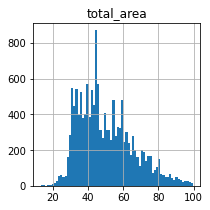

Значение с максимальной частотой:  45.0

count    14669.000000
mean        50.092961
std         15.502129
min         13.000000
25%         38.000000
50%         46.400000
75%         60.000000
max         99.600000
Name: total_area, dtype: float64

Для столбца total_area распределение похоже на распределение Пуассона с максимумом частоты при значении равным 45.0, с медианой равной 46.4 и средним - 50.1.

Столбец kitchen_area


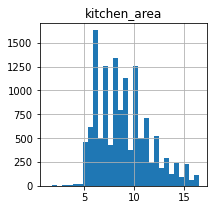

Значение с максимальной частотой:  6.0

count    13159.000000
mean         8.853375
std          2.591380
min          1.300000
25%          6.900000
50%          8.500000
75%         10.455000
max         16.500000
Name: kitchen_area, dtype: float64

Для столбца kitchen_area распределение похоже на распределение Пуассона с максимумом частоты при значении равным 6.0, с медианой равной 8.5 и средним - 8.9.

Столбец last_price


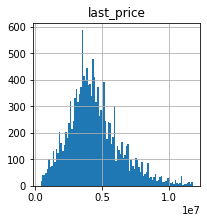

Значение с максимальной частотой:  4500000.0

count    1.466900e+04
mean     4.455761e+06
std      1.964536e+06
min      4.300000e+05
25%      3.150000e+06
50%      4.190000e+06
75%      5.500000e+06
max      1.180000e+07
Name: last_price, dtype: float64

Для столбца last_price распределение похоже на распределение Пуассона с максимумом частоты при значении равным 4500000.0, с медианой равной 4190000.0 и средним - 4455760.8.

Столбец rooms


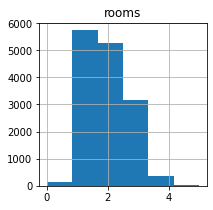

Значение с максимальной частотой:  1

count    14669.000000
mean         1.857250
std          0.856609
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: rooms, dtype: float64

Для столбца rooms распределение похоже на распределение Пуассона с максимумом частоты при значении равным 1.0, с медианой равной 2.0 и средним - 1.9.

Столбец ceiling_height


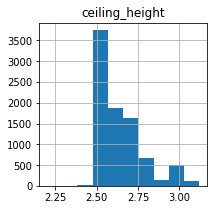

Значение с максимальной частотой:  2.5

count    8713.000000
mean        2.634362
std         0.146259
min         2.200000
25%         2.500000
50%         2.600000
75%         2.700000
max         3.120000
Name: ceiling_height, dtype: float64

Для столбца ceiling_height распределение похоже на распределение Пуассона с максимумом частоты при значении равным 2.5, с медианой равной 2.6 и средним - 2.6.

Столбец floor


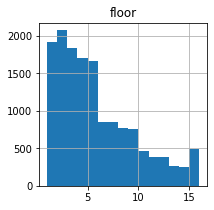

Значение с максимальной частотой:  2

count    14669.000000
mean         5.374054
std          3.832697
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         16.000000
Name: floor, dtype: float64

Для столбца floor распределение похоже на распределение Пуассона с максимумом частоты при значении равным 2.0, с медианой равной 4.0 и средним - 5.4.

Столбец cityCenters_nearest_km


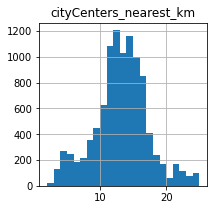

Значение с максимальной частотой:  12.0

count    10134.000000
mean        12.708013
std          4.099919
min          2.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         25.000000
Name: cityCenters_nearest_km, dtype: float64

Для столбца cityCenters_nearest_km распределение похоже на нормальное распределение с максимумом частоты при значении равным 12.0, с медианой равной 13.0 и средним - 12.7.

Столбец parks_nearest


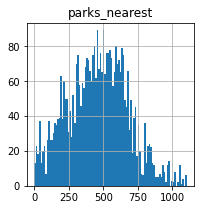

Значение с максимальной частотой:  441.0

count    3819.000000
mean      460.640482
std       216.498348
min         1.000000
25%       307.000000
50%       464.000000
75%       610.000000
max      1103.000000
Name: parks_nearest, dtype: float64

Для столбца parks_nearest распределение похоже на распределение Пуассона с максимумом частоты при значении равным 441.0, с медианой равной 464.0 и средним - 460.6.



In [13]:
analysis('total_area', 70)
analysis('kitchen_area', 30)
analysis('last_price', 100)
analysis('rooms', 6)
analysis('ceiling_height', 10)
analysis('floor', 15)
analysis('cityCenters_nearest_km', 23)
analysis('parks_nearest', 100)

<div>
    <font color="green">
        Функция для вывода гистограмм и значений  статистических величин для столбцов, по распределениям которых можно выделить несколько пиков.
    </font>
</div>

In [14]:
def peak(col, bs, lst):
    analysis(col, bs)
    value_max = data[col].value_counts().index[0]
    value_max_lst = []
    print()
    print(f'Заметны {len(lst)+1} пика: ')
    print(value_max)
    for elem in lst:
        elem_lst = data.loc[data[col]>elem, col].value_counts().index[0]
        print(elem_lst)
    print()


Столбец living_area


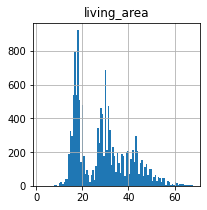

Значение с максимальной частотой:  18.0

count    13413.000000
mean        28.919138
std         11.382826
min          2.000000
25%         18.000000
50%         28.400000
75%         37.000000
max         67.900000
Name: living_area, dtype: float64

Заметны 3 пика: 
18.0
30.0
43.0

Столбец floors_total


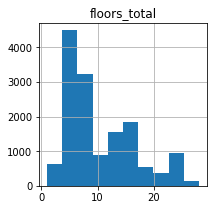

Значение с максимальной частотой:  5.0

count    14634.000000
mean        10.635916
std          6.160567
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         28.000000
Name: floors_total, dtype: float64

Заметны 3 пика: 
5.0
12.0
25.0

Столбец airports_nearest_km


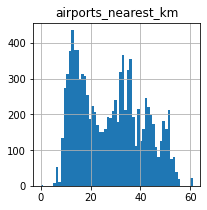

Значение с максимальной частотой:  13.0

count    10124.000000
mean        28.029929
std         12.835296
min          0.000000
25%         16.000000
50%         28.000000
75%         38.000000
max         61.000000
Name: airports_nearest_km, dtype: float64

Заметны 4 пика: 
13.0
33.0
42.0
51.0



In [15]:
peak('living_area', 100, [20, 40])
peak('floors_total', 10, [10, 20])
peak('airports_nearest_km', 60, [20, 40, 47])

In [16]:
def bar_col(col):
    data_bar = data[col].value_counts().reset_index()
    data_bar.columns = [col, 'frequency']
    #sns.FacetGrid(data=data['floor_type'].reset_index()).map(plt.hist, 'floor_type')
    sns.barplot(x=col,
                y='frequency',
                data=data_bar)
    plt.show()
    print(data[col].describe())
    return

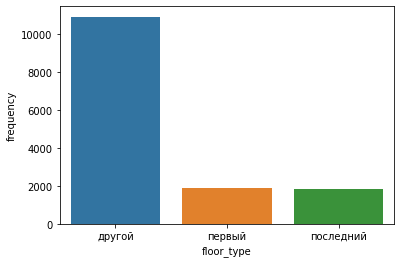

count      14669
unique         3
top       другой
freq       10928
Name: floor_type, dtype: object

Для типа этажа самое частое значение - "другой".



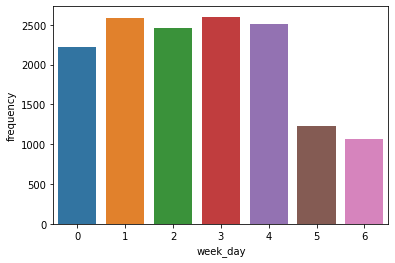

count    14669.000000
mean         2.581771
std          1.794250
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day, dtype: float64

Для дня недели чаще всего размещали объявления в четверг. Также заметно,что в выходные размещений было меньше, чем в будние дни.



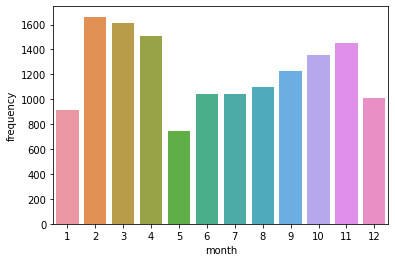

count    14669.000000
mean         6.398459
std          3.495156
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

Для месяца недели график выглядит равномерно. Медиана и среднее близки по значению и равны 6 и 6.421918 соответственно. Максимальное значение частоты равно 2, минимальное - 5.


In [17]:
bar_col('floor_type')
print()
print('Для типа этажа самое частое значение - "другой".', end='\n\n')
bar_col('week_day')
print()
print('Для дня недели чаще всего размещали объявления в четверг. Также заметно,что в выходные размещений было меньше, чем в будние дни.', end='\n\n')
bar_col('month')
print()
print('Для месяца недели график выглядит равномерно. Медиана и среднее близки по значению и равны 6 и 6.421918 соответственно. Максимальное значение частоты равно 2, минимальное - 5.')

<div>
    <font color="green">
        Исходя из диаграммы размаха можно считать, что слишком долгими продажами можно считать продажи, длительность которых составляла больше 350 дней. Быстрыми можно посчитать продажи, длительность которых меньше значения первой квартили,то есть меньше 37 дней.
        Максимум частоты - при значение равным 45 дням. Медиана равна 73, то есть половина квартир распрадалась менее, чем за 73 дня. Средне - 114.007300. </font>
</div>

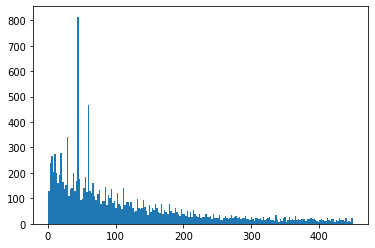

AxesSubplot(0.125,0.125;0.775x0.755)

Значение с максимальной частотой:  45.00000000000001


count    12740.000000
mean       114.007300
std        106.723817
min          1.000000
25%         37.000000
50%         73.000000
75%        162.000000
max        449.000000
Name: days_exposition, dtype: float64

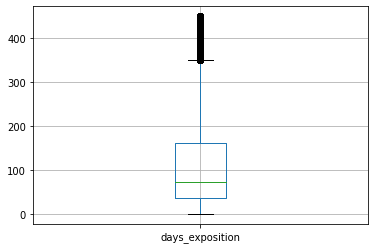

In [18]:
plt.figure(1)
plt.hist(data['days_exposition'], bins=200)
plt.show()
print(data.boxplot('days_exposition'))
print()
print('Значение с максимальной частотой: ', data['days_exposition'].value_counts().index[0])
data['days_exposition'].describe()


<div>
    <font color="green">Как видно из графиков, есть линейная зависимость цены от площади квартиры, но при площадях примерно до 70. Затем идёт большой разброс. Коэффициент корреляции Пирсона равен 0.638663. Чем больше площадь, тем больше цена. Больше всего в данных - недвижимость, площадью примерно равной 30  ценой от 3 000 000 до 4 000 000.
На графике особой линейной зависимости между ценой и жилой площадью не видно. Но всё-таки более высокая цена у большей пложади. Коэффициент Пирсона равен 0.517019. Больше всего объявлений недвижимости, жилой площадью равной примерно от 15 до 20 и ценой от 3 000 000 до 4 000 000.</font>
</div>

            last_price  total_area
last_price    1.000000    0.638663
total_area    0.638663    1.000000
             last_price  living_area
last_price     1.000000     0.517019
living_area    0.517019     1.000000


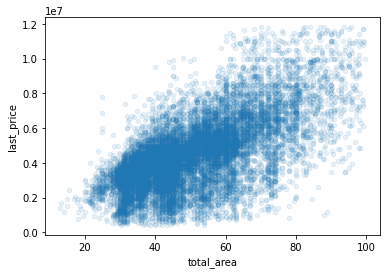

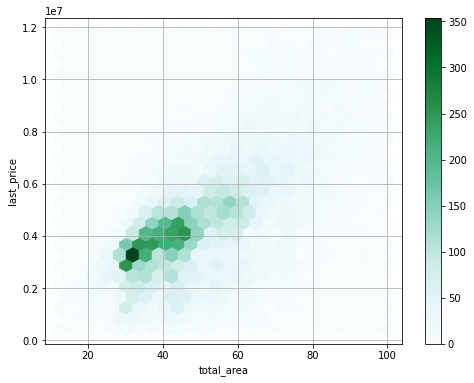

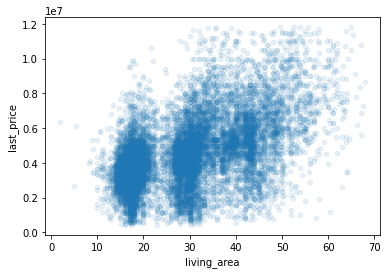

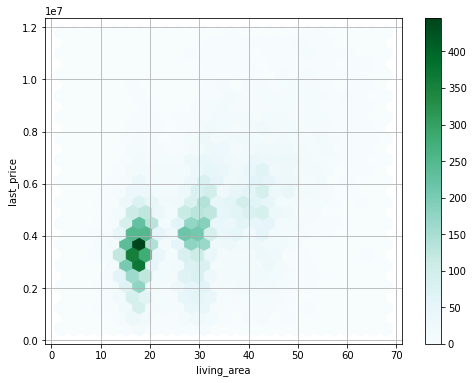

In [19]:
def plot_corr(col):#функция рисования графиков и рассчёта коэффициента Пуассона для столбцов с колличественными значениями
    data.plot(y='last_price', x=col, kind='scatter', alpha=0.1)
    data.plot(y='last_price', x=col, kind='hexbin', gridsize=25, figsize=(8, 6), sharex=False, grid=True)
    print(data[['last_price',col]].corr())
    return

plot_corr('total_area')
plot_corr('living_area')


<div>
    <font color="green">Линейная зависимость цены от площади кухни слабо выражена. Коэффициент Пирсона равен 0.438995. Больше всего объявлений размещено с недвижимостью, площадью кухни равной примерно 7 и ценой около 4 000 000.</font>
</div>

              last_price  kitchen_area
last_price      1.000000      0.438995
kitchen_area    0.438995      1.000000


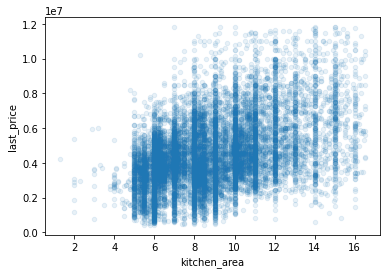

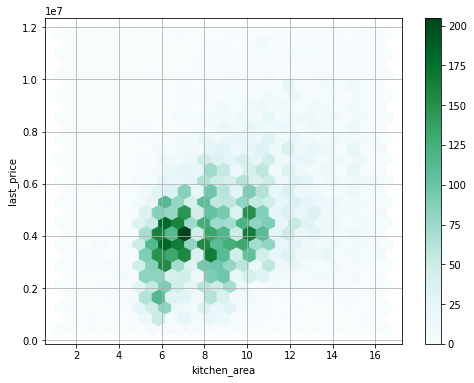

In [20]:
plot_corr('kitchen_area')

<div>
    <font color="green">Медиана цены заметно зависит от числа комнат и возрастает с их числом до значения равному 4 комнатам. Затем медиана цена для 5 комнат становится меньше, чем для 4.
Цена от типа этажа зависит следующим образом: медиана и среднее цены наименьшие для недвижимости с первым этажом, затем немного возрастают для последнего этажа и значительно наибольшие для других этажей.
Медиана цены значительно меньше относительно остальных дней в пятницу, наибольшая в понедельник.
Максимальное значение медианы цены - в апреле, минимальное - в июне.
Медиана цены была максимальной в 2014 году, затем к 2015 сильно снизилась, к 2017 ещё немного снизилась, затем к 2019 году стала повышаться.</font>
</div>

,rooms,median_col,mean_col
0,0,2700000.0,2.871433e+06
1,1,3550000.0,3.638550e+06
2,2,4500000.0,4.635852e+06
3,5,5200000.0,5.333333e+06
4,3,5400000.0,5.568636e+06
5,4,5800000.0,5.677183e+06


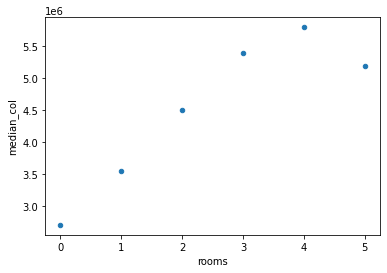

,floor_type,median_col,mean_col
0,первый,3580000.0,3.771115e+06
1,последний,3650000.0,3.833699e+06
2,другой,4390000.0,4.679593e+06


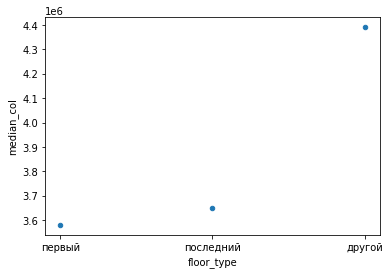

,week_day,median_col,mean_col
0,4,4100000.0,4.424851e+06
1,1,4150000.0,4.467201e+06
2,6,4168500.0,4.421966e+06
3,5,4190000.0,4.359316e+06
4,2,4200000.0,4.481964e+06
5,3,4200000.0,4.471587e+06
6,0,4234000.0,4.499430e+06


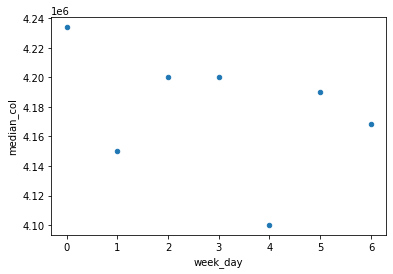

,month,median_col,mean_col
0,6,4000000.0,4.243681e+06
1,7,4100000.0,4.439721e+06
2,10,4100000.0,4.418131e+06
3,1,4150000.0,4.442630e+06
4,2,4150000.0,4.450074e+06
5,5,4150000.0,4.486095e+06
6,8,4150000.0,4.430705e+06
7,12,4187500.0,4.502540e+06
8,3,4200000.0,4.477661e+06
9,9,4200000.0,4.488625e+06


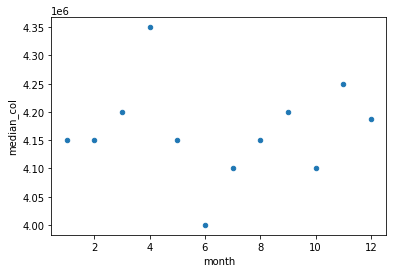

,year,median_col,mean_col
0,2017,4050000.0,4.378102e+06
1,2016,4100000.0,4.422195e+06
2,2018,4150000.0,4.419145e+06
3,2015,4200000.0,4.537030e+06
4,2019,4600000.0,4.768852e+06
5,2014,7500000.0,6.491429e+06


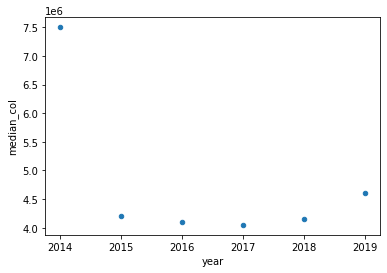

In [21]:
def plot_categ(col):#функция для построения графиков для столбцов с категориальными значениями
    print('\n')
    pivot_price_floor = data.pivot_table(index=col, values='last_price', aggfunc=(['median','mean']))
    pivot_price_floor.columns = ['median_col','mean_col']
    pivot_price_floor = pivot_price_floor.sort_values('median_col').reset_index()
    display(pivot_price_floor)
    pivot_price_floor.plot(y='median_col', x=col, kind='scatter')
    plt.show()

plot_categ('rooms')
plot_categ('floor_type')
plot_categ('week_day')
plot_categ('month')
plot_categ('year')

In [22]:

data_name_meter = data.loc[data['locality_name'].isin(data['locality_name']\
                                    .value_counts().index[0:10]), ['locality_name','price_meter']]#отбор 10 самых по частоте 
                                                                                  #встречаемости в данных населённых пунктов
                                                                                  #и их средняя цена за квадратный метр
print(data_name_meter.groupby('locality_name')['price_meter'].mean())    
#поиск населённого пункта с самой максимальной ценой за квадратный метр и минимальной
print()
print('Населённый пункт с самой высокой ценой за квадратный метр из 10 самых распространённых в данных населённых пунктов - ',\
      data.loc[data.loc[data['locality_name'].isin(data_name_meter['locality_name'].value_counts().index), 'price_meter'].\
         idxmax(), 'locality_name'])
print()
print('Населённый пункт с самой низкой ценой за квадратный метр из 10 самых распространённых в данных населённых пунктов - ',\
      data.loc[data.loc[data['locality_name'].isin(data_name_meter['locality_name'].value_counts().index), 'price_meter'].\
         idxmin(), 'locality_name'])

locality_name
Всеволожск                  66911.789162
Выборг                      57975.787996
Гатчина                     68663.628354
Кириши                      38980.499950
Кудрово                     96143.601937
Мурино                      86068.691395
Санкт-Петербург            104023.715902
деревня Новое Девяткино     76134.835612
посёлок Парголово           89051.048407
посёлок Шушары              80437.398828
Name: price_meter, dtype: float64

Населённый пункт с самой высокой ценой за квадратный метр из 10 самых распространённых в данных населённых пунктов -  Санкт-Петербург

Населённый пункт с самой низкой ценой за квадратный метр из 10 самых распространённых в данных населённых пунктов -  Гатчина


<div>
    <font color="green">По графику видно, что в городе Санкт-Петербург с увеличением расстояния до центра города, цена в общем уменьшается. Данная зависимость мало похожа на линейную. Коэффициент Пирсона равен -0.280948.</font>
</div>

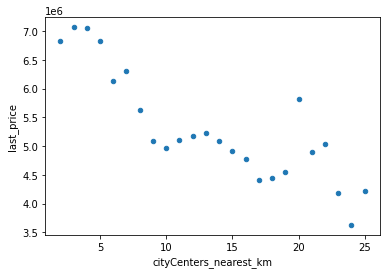

,last_price,cityCenters_nearest_km
last_price,1.000000,-0.280948
cityCenters_nearest_km,-0.280948,1.000000


In [23]:
data_centre = data.loc[data['locality_name']=='Санкт-Петербург'].groupby('cityCenters_nearest_km')['last_price'].mean().\
reset_index()
data_centre.plot(y='last_price', x='cityCenters_nearest_km', kind='scatter')
plt.show()
data[['last_price', 'cityCenters_nearest_km']].corr()


### Общий вывод


*Были изученны данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктов.\
Такие признаки, как общая площадь, площадь кухни, цена, число комнат, высота потолка, этаж, расстояние до ближайшего парка имеют расспределение, похожее на расспределение Пуассона. Расстояние до центра города имеет расспределение, похожее на нормальное расспределение.\
В признаке жилая площадь чаще всего встречаются объявления со значением 18, также выделяются значения 30 и 43.\
Чаще других в данных встречаются объявления с общим числом этажей равным 5. Также выделяются значения 12 и 25.\
Самое часто встречаемое значение расстояния до аэропорта - 13 км. Больше четверти объявлений имеют данное растояние до аэропорта.\
Первый и последний этажи встречаются по числу вхождений примерно  в третьей части объявлений.\ 
В субботу и воскресенье реже, чем в будние дни, размещали объявления о продаже.\
По месяцам особой разницы в числе объявлений нет.\
Половина недвижимости распродавалась до 73 дней. При этом чаще всего продажа осуществлялась за 45 дней. Также встречались долгие продажи, где объекты продавались около года после размещения объявления. И - быстрые продажи, когда объекты продавались за время до 37 дней.\
Цена с хорошей достоверностью прямо зависит от общей площади. Чем больше общая площадь, тем выше цена. При этом значение жилой площади и площади кухни на цену влияет слабо. При больших значениях общей площади большой разброс. Скорее всего это связано с недостаточным колличеством данных. Поэтому судить о характере зависимости при таких общих площадях можно будет, дополнив данные.\
Цена заметно зависит от числа комнат в прямой пропорциональности. В пределах от 1 до 4 комнат. Чем больше комнат, тем выше цена.\
Также среди всех объявлений значительно дешевле объекты с первым и последним этажами по сравнению с остальными.\
В период от 2014 года по 2019 год самая высокая цена была в 2014 году. К 2015 году она значительно снизилась и затем слабо менялась, при этом после 2017 года цена поднималась.\
10 самых встречаемых населённых пунктов в данных: Всеволожск, Выборг, Гатчина, Кириши, Кудрово, Мурино, Санкт-Петербург, деревня Новое Девяткино, посёлок Парголово, посёлок Шушары. Из перечисленных населённых пунктов в Санкт-Петербурге самая высокая цена за квадратный метр, в Гатчине - самая низкая.\
В городе Санкт-Петербург с увеличением расстояния до центра города, цена в общем уменьшается. Данная зависимость мало похожа на линейную.\
Можно также исследовать зависимость скорости продажи от колличества размещённых фотографий или этажность здания в зависимости от расстояния до центра города и т.д.* 